In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = "Arial"

In [2]:
datapath = '../../DataTables/Thresholds.csv'
thresholds = pd.read_csv(datapath)

In [3]:
def mag2db( factor ):
    import numpy as np
    mag = 20 * np.log10(factor)
    return mag

In [4]:
thresholds[['AvgAlldb','AvgLastdb']] = mag2db(thresholds[['AvgAll', 'AvgLast']]) - mag2db(0.5)

# Figures

In [5]:
print(sns.color_palette("deep").as_hex())

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


In [6]:
colorpalette=['#55a868','#8172b3']

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


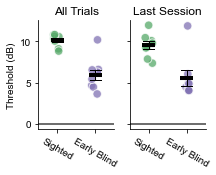

In [7]:
f, axs = plt.subplots(1,2,sharey=True)

f.set_size_inches(3, 2)

axs[0].axhline(y=0, color=".25")
sns.stripplot(x="group", y="AvgAlldb", data=thresholds, order=["SC","EB"], alpha=.75, ax=axs[0], palette=colorpalette,
             edgecolor='white', linewidth=1, size=8.5, zorder=1, marker='o')
sns.pointplot(x="group", y="AvgAlldb", data=thresholds, order=["SC","EB"], ci=68, scale=2, markers='_',
              errwidth=1, capsize=0.3, color='0', join=False, ax=axs[0])

plt.subplot(1,2,1)
plt.ylabel('Threshold (dB)', fontsize=10);
plt.xlabel('');
plt.xticks([0, 1], ['Sighted', 'Early Blind'], rotation=-30)
plt.yticks([0, 5, 10], ['0', '5', '10'])
plt.title('All Trials')

axs[1].axhline(y=0, color=".25")
sns.stripplot(x="group", y="AvgLastdb", data=thresholds, order=["SC","EB"], alpha=.75, ax=axs[1], palette=colorpalette,
             edgecolor='white', linewidth=1, size=8.5, zorder=1, marker='o')
sns.pointplot(x="group", y="AvgLastdb", data=thresholds, order=["SC","EB"], ci=68, scale=2, markers='_',
              errwidth=1, capsize=0.3, color="0", join=False, ax=axs[1])

plt.subplot(1,2,2)
plt.ylabel('');
plt.xlabel('');
plt.xticks([0, 1], ['Sighted', 'Early Blind'], rotation=-30)
plt.yticks([0, 5, 10], ['0', '5', '10'])
plt.title('Last Session')

sns.despine()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.3, 0.3, 0.3), (0.3, 0.3, 0.3)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.3, 0.3, 0.3), (0.3, 0.3, 0.3)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


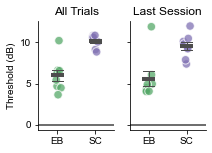

In [8]:
f, axs = plt.subplots(1,2,sharey=True)

f.set_size_inches(3, 2)

axs[0].axhline(y=0, color=".25")
sns.stripplot(x="group", y="AvgAlldb", data=thresholds, order=["EB","SC"], alpha=.75, ax=axs[0], palette=colorpalette,
             edgecolor='white', linewidth=1, size=8.5, marker='o', zorder=1)
sns.pointplot(x="group", y="AvgAlldb", data=thresholds, order=["EB","SC"], ci=68, scale=2, markers='_',
              errwidth=1, capsize=0.3, color="0.3", join=False, ax=axs[0])

plt.subplot(1,2,1)
plt.ylabel('Threshold (dB)', fontsize=10);
plt.xlabel('');
plt.xticks([0, 1], ['EB', 'SC'])
plt.yticks([0, 5, 10], ['0', '5', '10'])
plt.title('All Trials')

axs[1].axhline(y=0, color=".25")
sns.stripplot(x="group", y="AvgLastdb", data=thresholds, order=["EB","SC"], alpha=.75, ax=axs[1], palette=colorpalette, 
             edgecolor='white', linewidth=1, zorder=1, size=8.5, marker='o')
sns.pointplot(x="group", y="AvgLastdb", data=thresholds, order=["EB","SC"], ci=68, scale=2, markers='_',
              errwidth=1, capsize=0.3, color="0.3", join=False, ax=axs[1])

plt.subplot(1,2,2)
plt.ylabel('');
plt.xlabel('');
plt.xticks([0, 1], ['EB', 'SC'])
plt.yticks([0, 5, 10], ['0', '5', '10'])
plt.title('Last Session')

sns.despine()


# Stats

In [9]:
import pingouin as pg

In [10]:
x1 = thresholds.loc[thresholds["group"]=="EB"]["AvgAlldb"]
y1 = thresholds.loc[thresholds["group"]=="SC"]["AvgAlldb"]
pg.ttest(x1,y1)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.473466,14,two-sided,0.000082,"[-5.8, -2.53]",2.736733,223.141,0.999063


In [11]:
x2 = thresholds.loc[thresholds["group"]=="EB"]["AvgLastdb"]
y2 = thresholds.loc[thresholds["group"]=="SC"]["AvgLastdb"]
pg.ttest(x2,y2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.706468,14,two-sided,0.002347,"[-6.22, -1.66]",1.853234,15.164,0.930877
